In [88]:
import pandas as pd

In [89]:
arquivos = ["./canc2023.parquet", "./canc2024.parquet"]
df = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos], ignore_index=True)

In [90]:
print("Colunas:", df.columns) #Variáveis anteriormente observadas no Dicionário de Dados

Colunas: Index(['TP_NOT', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'ID_AGRAVO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_DIAG', 'SEM_DIAG',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS',
       'ID_OCUPA_N', 'SIT_TRAB', 'NUTEMPO', 'TPTEMPO', 'CNAE', 'UF_EMP',
       'MUN_EMP', 'TERCEIRIZA', 'NUTEMPORIS', 'TPTEMPORIS', 'REGIME',
       'DIAG_ESP', 'ASBESTO', 'SILICA', 'AMINA', 'BENZENO', 'ALCATRAO',
       'HIDROCARBO', 'OLEOS', 'BERILIO', 'CADMIO', 'CROMO', 'NIQUEL',
       'IONIZANTES', 'NAO_IONIZA', 'HORMONIO', 'NEOPLASICO', 'OUTRO_EXP',
       'FUMA', 'TEMPO_FUMA', 'TP_TEMP_FU', 'TRAB_DOE', 'EVOLUCAO', 'DT_OBITO',
       'CAT', 'OUT_EXP_DE', 'DT_DIGITA', 'DT_TRANSUS', 'DT_TRANSDM',
       'DT_TRANSSM', 'DT_TRNASRM', 'DT_TRANSRS', 'DT_TRANSSE', 'NU_LOTE_V',
       'NU_LOTE_H'],
      dtype='object')


In [91]:
colunas_desejadas = [
    "ID_OCUPA_N", "NUTEMPO", "TPTEMPO", "NUTEMPORIS", "TPTEMPORIS",
    "ASBESTO", "CADMIO", "SILICA", "CROMO", "AMINA", "NIQUEL", "BENZENO",
    "IONIZANTES", "ALCATRAO", "NAO_IONIZA", "HIDROCARBO", "HORMONIO",
    "OLEOS", "NEOPLASICO", "BERILIO", "OUTRO_EXP", "OUT_EXP_DE", 
    "FUMA", "TEMPO_FUMA", "TP_TEMP_FU", "CAT"
]



In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = df[[col for col in colunas_desejadas if col in df.columns]]


In [94]:
df = df.dropna(thresh=len(df.columns) - 5)


In [95]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Desconhecido")
    else:
        df[col] = df[col].fillna(0)

In [96]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [97]:
X = df.drop("CAT", axis=1)
y = df["CAT"]


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.00      0.00      0.00         4
           2       0.69      0.90      0.78       240
           3       0.52      0.33      0.40        88
           4       0.57      0.25      0.35        64

    accuracy                           0.70       449
   macro avg       0.56      0.50      0.51       449
weighted avg       0.67      0.70      0.66       449



In [101]:
importancias = modelo.feature_importances_
indices = importancias.argsort()[::-1]
colunas_ordenadas = X.columns[indices]



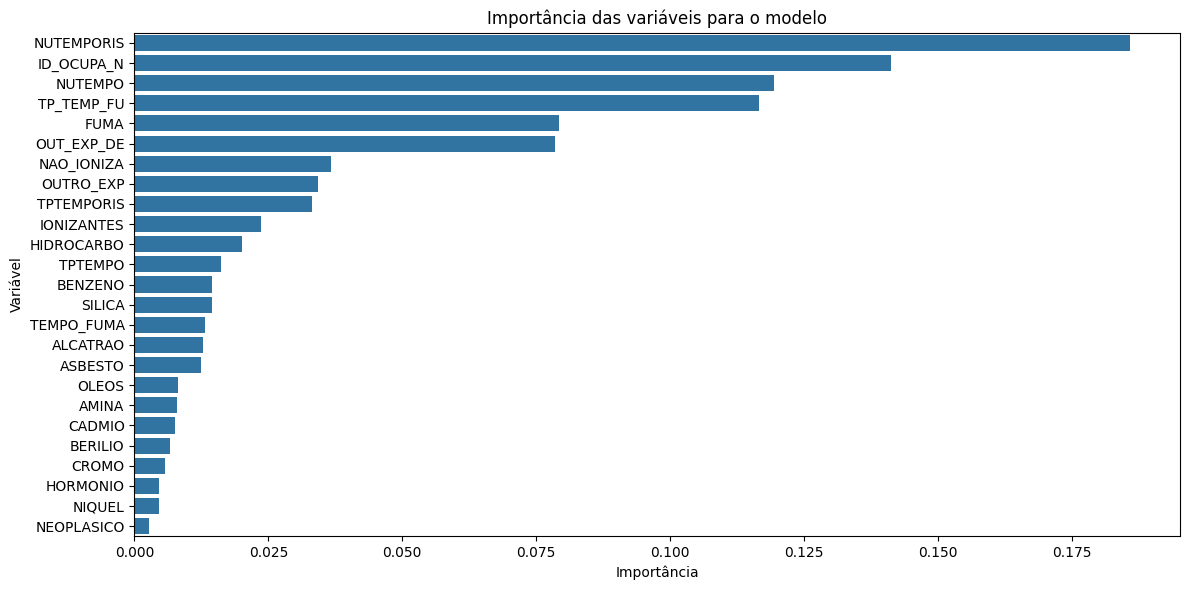

In [102]:
# Gráfico de importância das features
plt.figure(figsize=(12, 6))
sns.barplot(x=importancias[indices], y=colunas_ordenadas)
plt.title("Importância das variáveis para o modelo")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

In [106]:
# Treina o modelo 20x
for i in range(1, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    modelo = RandomForestClassifier(random_state=i)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    print(f"\n➡️ Treinamento {i}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))



➡️ Treinamento 1
Acurácia: 0.6837416481069042
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.00      0.00      0.00         6
           2       0.67      0.89      0.77       227
           3       0.46      0.28      0.35        93
           4       0.71      0.35      0.47        68

    accuracy                           0.68       449
   macro avg       0.57      0.50      0.52       449
weighted avg       0.66      0.68      0.65       449


➡️ Treinamento 2
Acurácia: 0.6926503340757239
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.00      0.00      0.00         3
           2       0.70      0.87      0.78       244
           3       0.46      0.32      0.38        91
           4       0.61      0.31      0.41        61

    accuracy                           0.69       449
   macro avg       0.55      0.50    

TESTES DO MODELO

In [104]:
# Seus dados (exemplo — preencha com seus próprios valores!)
meus_dados = {
    "ID_OCUPA_N": 1,  # ocupação
    "NUTEMPO": 5,
    "TPTEMPO": 1,
    "NUTEMPORIS": 0,
    "TPTEMPORIS": 0,
    "ASBESTO": 1,
    "CADMIO": 0,
    "SILICA": 1,
    "CROMO": 0,
    "AMINA": 0,
    "NIQUEL": 0,
    "BENZENO": 1,
    "IONIZANTES": 0,
    "ALCATRAO": 0,
    "NAO_IONIZA": 0,
    "HIDROCARBO": 0,
    "HORMONIO": 0,
    "OLEOS": 0,
    "NEOPLASICO": 0,
    "BERILIO": 0,
    "OUTRO_EXP": 0,
    "OUT_EXP_DE": 0,
    "FUMA": 1,
    "TEMPO_FUMA": 10,
    "TP_TEMP_FU": 1
}


In [107]:
df[col] = df[col].fillna("Desconhecido")
label_encoders.fit(df[col].tolist() + ["Desconhecido"])


AttributeError: 'dict' object has no attribute 'fit'

In [ ]:
for col in df_input.columns:
    if col in label_encoders:
        le = label_encoders[col]
        try:
            df_input[col] = le.transform(df_input[col])
        except ValueError as e:
            print(f"❌ Valor não reconhecido na coluna '{col}': {df_input[col].values}")
            print("🔁 Substituindo por valor padrão válido...")
            df_input[col] = le.transform([le.classes_[0]])  # substitui pelo primeiro valor conhecido


❌ Valor não reconhecido na coluna 'ID_OCUPA_N': [43]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'NUTEMPO': [5]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'TPTEMPO': [1]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'NUTEMPORIS': [0]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'TPTEMPORIS': [0]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'ASBESTO': [1]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'CADMIO': [0]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'SILICA': [1]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'CROMO': [0]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'AMINA': [0]
🔁 Substituindo por valor padrão válido...
❌ Valor não reconhecido na coluna 'NIQUEL': [0]
🔁 Substituindo por valor padrão válido